In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cluster_utils as cu
import db_utils as db
import os
import pandas as pd
import importlib

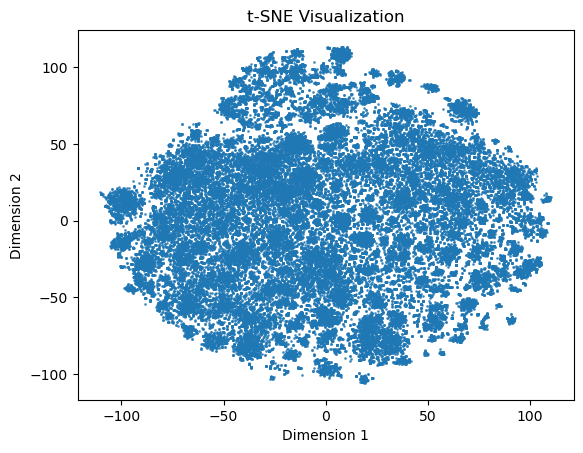

In [2]:
# get folder outside current directory (project folder)
current_dir = os.path.dirname(os.getcwd())
proj_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Load the 2D coordinates
coordinates = np.load(proj_dir + "/dataset/pubmed_20241121_working_memory.embd.npy")

# Scatter plot
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=1, alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


## Clustering

### hdbscan

In [3]:
%pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
coordinates.shape

(73763, 2)

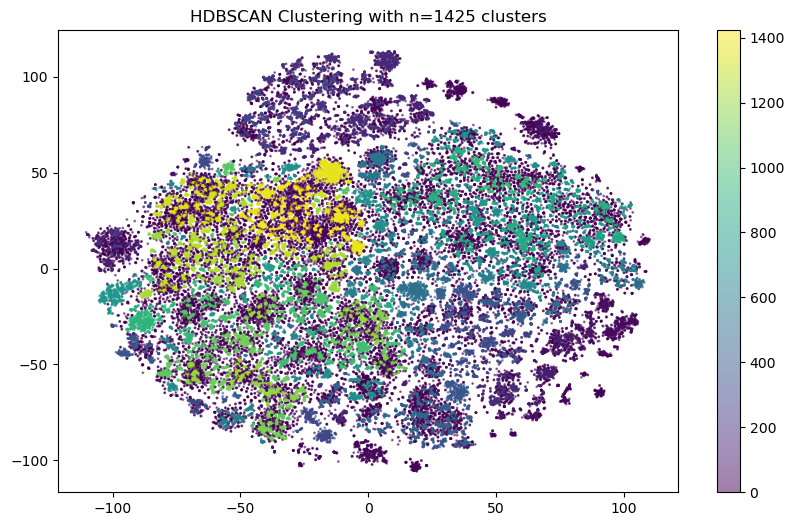

In [ ]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, min_cluster_size=10, gen_min_span_tree=True, plot=1)

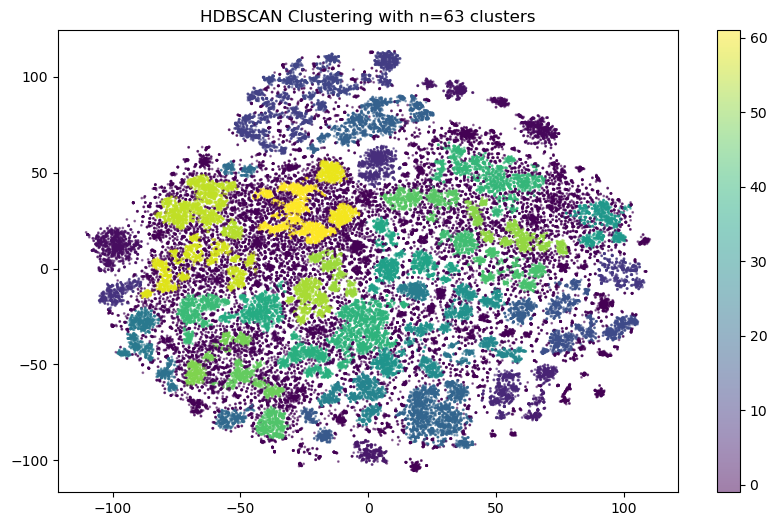

In [3]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, 
                                    min_cluster_size=250, min_samples=50, 
                                    gen_min_span_tree=True, plot=1)

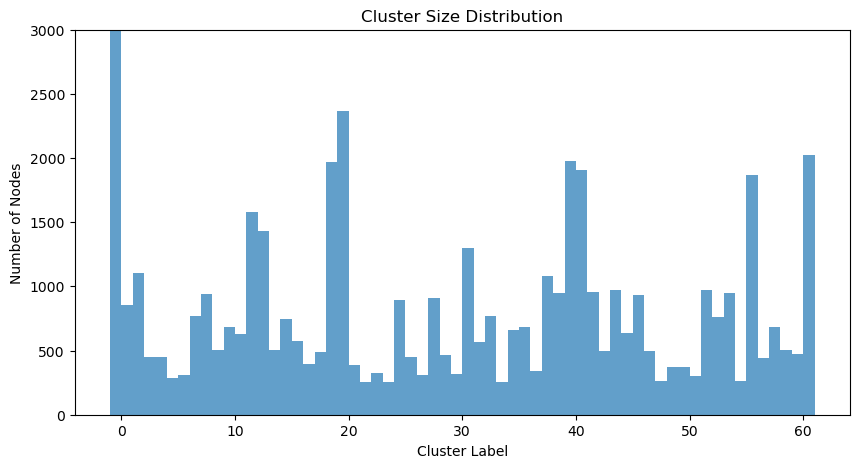

In [4]:
# plot cluster size distribution

plt.figure(figsize=(10, 5))
plt.hist(hdbscan_labels, bins=np.arange(-1, hdbscan_labels.max()+1, 1), alpha=0.7)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Nodes")
plt.ylim(0, 3000)
plt.show()

### K-means clustering

Let's start with a random number of clusters... (use same # found from hdbscan)

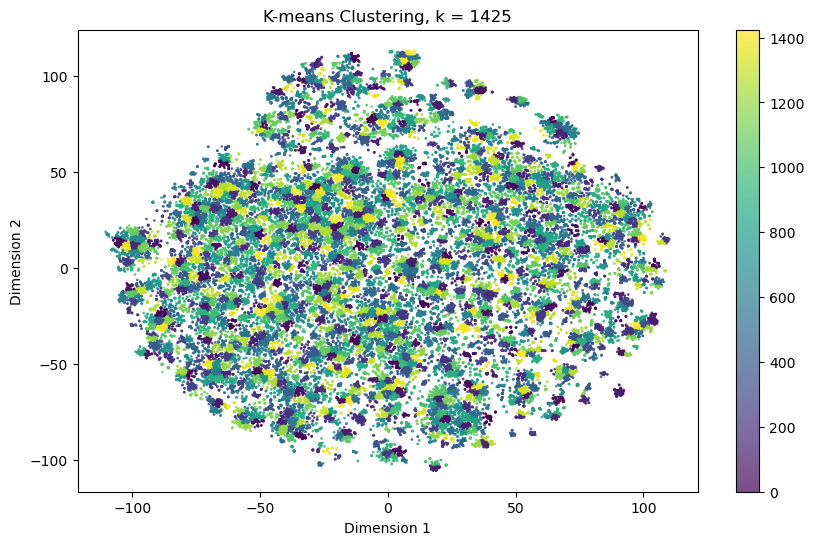

In [21]:
# Plot the clusters
importlib.reload(cu)
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=1425, plot=1)

#### Optimal cluster number

Best number of clusters:  90
Best score:  4060665.25


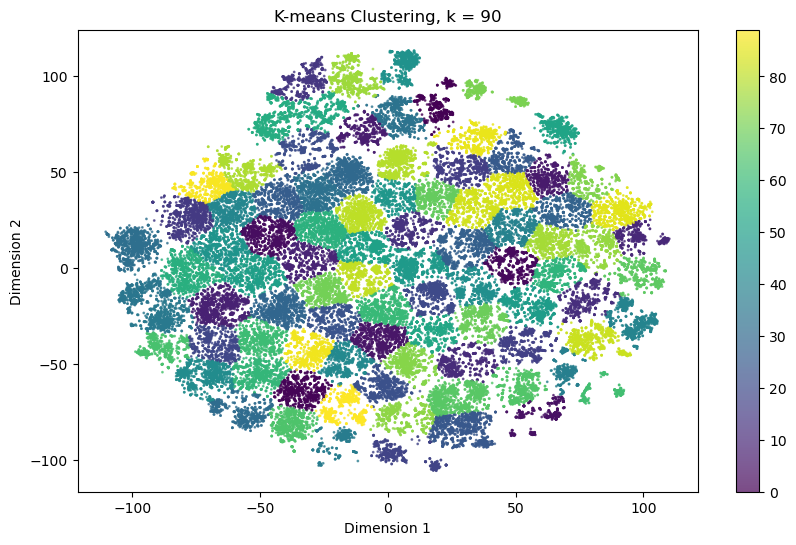

In [23]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = np.arange(10, 100, 10)
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1)

Best number of clusters:  900
Best score:  289852.8125


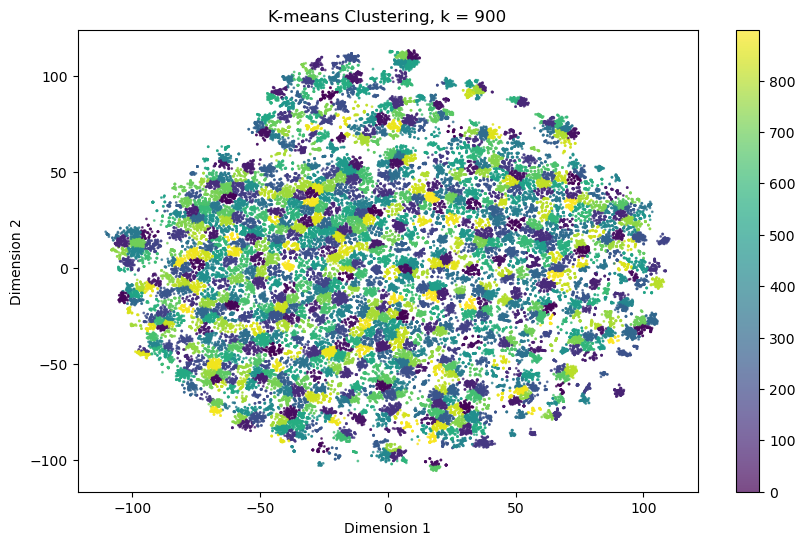

In [25]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = np.arange(100, 1000, 100)
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1)

Best number of clusters:  1425
Best score:  169278.15625


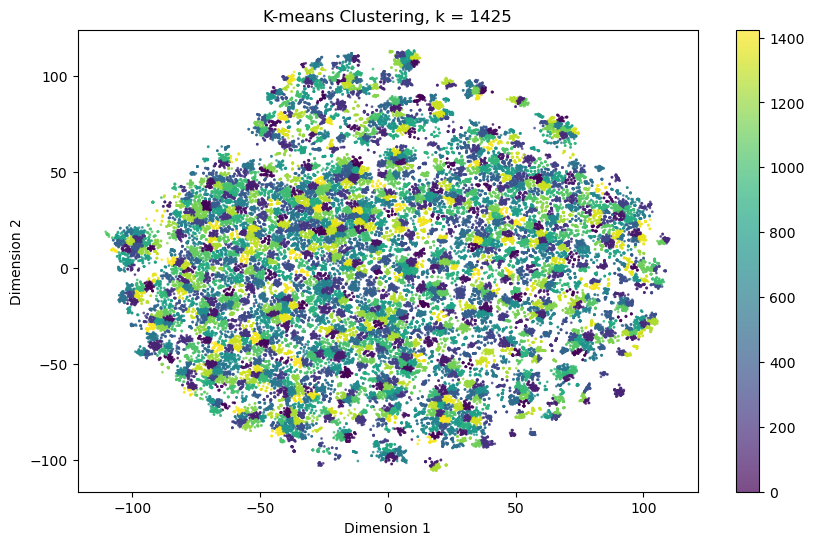

In [26]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = [1425]
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1)

### Louvain

## Stats

In [35]:
df = pd.read_csv(
            proj_dir + "/dataset/pubmed_20241121_working_memory.raw",
            sep="\t"
        )

df.head()

pmid                                              title  \
0   710  Effect of two weeks' treatment with thioridazi...   
1  2563  EEG sleep studies of insomniacs under flunitra...   
2  2812  Alcohol and backward masking of visual informa...   
3  2813  Recovery of verbal short-term memory in alcoho...   
4  6497  Effect of counterconditioning on test anxiety ...   

                             journal  year  \
0                Psychopharmacologia  1975   
1   International pharmacopsychiatry  1975   
2      Journal of studies on alcohol  1976   
3      Journal of studies on alcohol  1976   
4  Journal of educational psychology  1976   

                                            abstract  \
0  Forty paid healthy male students participated ...   
1  This study investigates the effect of flunitra...   
2  Alcohol increased the time necessary to transf...   
3  When given a short-term memory distractor test...   
4                                                NaN   

                                          mesh_terms  \
0  Adult;Animals;Anti-Anxiety Agents;Bromazepam;C...   
1  Adult;Anti-Anxiety Agents;Dreams;Electroenceph...   
2  Adult;Dose-Response Relationship, Drug;Ethanol...   
3  Adult;Age Factors;Aged;Alcohol Amnestic Disord...   
4  Achievement;Adolescent;Anxiety;Behavior Therap...   

                                         mesh_topics  
0  pharmacology;blood;pharmacology;pharmacology;p...  
1  therapeutic use;drug effects;adverse effects;p...  
2             pharmacology;drug effects;drug effects  
3  complications;complications;drug effects;drug ...  
4                                                NaN

In [7]:
importlib.reload(db)
points_df = db._get_points_df(None,
                  path_tsv = proj_dir + "/dataset/pubmed_20241121_working_memory.raw",
                  delimiter = "\t",
                  points = coordinates,
                  )
points_df.head()

* loaded df
* merged embds to df


pmid                                         mesh_terms  \
0   710  Adult;Animals;Anti-Anxiety Agents;Bromazepam;C...   
1  2563  Adult;Anti-Anxiety Agents;Dreams;Electroenceph...   
2  2812  Adult;Dose-Response Relationship, Drug;Ethanol...   
3  2813  Adult;Age Factors;Aged;Alcohol Amnestic Disord...   
4  6497  Achievement;Adolescent;Anxiety;Behavior Therap...   

                                         mesh_topics          x          y  
0  pharmacology;blood;pharmacology;pharmacology;p...  63.622860  -0.946062  
1  therapeutic use;drug effects;adverse effects;p...  66.674393  -3.964462  
2             pharmacology;drug effects;drug effects  72.948692 -34.044613  
3  complications;complications;drug effects;drug ...  74.610733 -32.538921  
4                                                NaN -39.706505 -48.968933

### hdbscan

In [8]:
print(np.unique(hdbscan_labels))
print(np.sum(hdbscan_labels == -1))
print(len(hdbscan_labels))
print(np.sum(hdbscan_labels == -1) / len(hdbscan_labels))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
26938
73763
0.3651966433035533


In [22]:
from collections import defaultdict

cluster_terms = defaultdict(list)
for index, label in enumerate(hdbscan_labels[1:]):
    # skip if cluster -1 (noise)
    if label == -1:
        continue

    mesh_terms = points_df.iloc[index, points_df.columns.get_loc("mesh_terms")]

    # Check if the 'mesh_terms' is NaN or missing
    if pd.isna(mesh_terms):
        continue  # Skip this iteration if mesh_terms is NaN

    # Otherwise, split the terms and add them to the cluster_terms
    cluster_terms[label].extend(
        [t for t in mesh_terms.split(";")]
    )

In [24]:
# Step 1: Extract unique values across all lists
unique_values = set(value for values in cluster_terms.values() for value in values)

# Step 2: Create a mapping of each unique value to an index
value_to_index = {value: idx for idx, value in enumerate(sorted(unique_values))}

# Step 3: Update the original dictionary to replace values with their indices
indexed_dict = {key: [value_to_index[value] for value in values] for key, values in cluster_terms.items()}

print(indexed_dict)

{43: [261, 553, 594, 1345, 1878, 2020, 2973, 3392, 4649, 5711, 5897, 7081, 8055, 8207, 8408, 9530, 9810, 305, 553, 1436, 1724, 3568, 4282, 5659, 5711, 5897, 6014, 6667, 7224, 7239, 261, 594, 860, 2020, 2920, 3568, 3659, 4649, 5711, 5897, 6252, 6685, 7529, 8306, 9701, 553, 951, 1819, 2284, 2856, 2916, 4094, 5883, 5897, 6547, 6613, 7712, 7720, 8645, 9597, 261, 295, 356, 2109, 3568, 4649, 5711, 5897, 6096, 132, 261, 444, 634, 893, 1221, 2713, 3135, 3568, 4371, 4649, 4735, 5711, 5897, 6252, 7884, 8087, 8306, 8795, 446, 1747, 4649, 5889, 5897, 5928, 219, 1820, 2916, 2920, 3568, 4649, 4708, 4880, 5711, 5897, 6014, 7529, 8020, 121, 219, 2192, 2856, 3067, 3559, 3568, 3750, 4649, 5711, 5897, 10286, 219, 261, 451, 912, 1820, 1847, 2069, 3309, 3788, 3802, 4523, 4649, 5041, 5372, 5889, 5892, 5897, 6096, 6252, 7702, 8925, 9314, 9707, 10459, 1820, 4649, 5038, 5897, 8959, 297, 404, 2600, 2623, 3568, 4649, 5136, 5711, 5892, 5897, 8039, 9607, 219, 295, 893, 1251, 1820, 2020, 2069, 2952, 4649, 5041, 541

In [25]:
print(len(indexed_dict[0]))
print(len(np.unique(indexed_dict[0])))

7831
1688


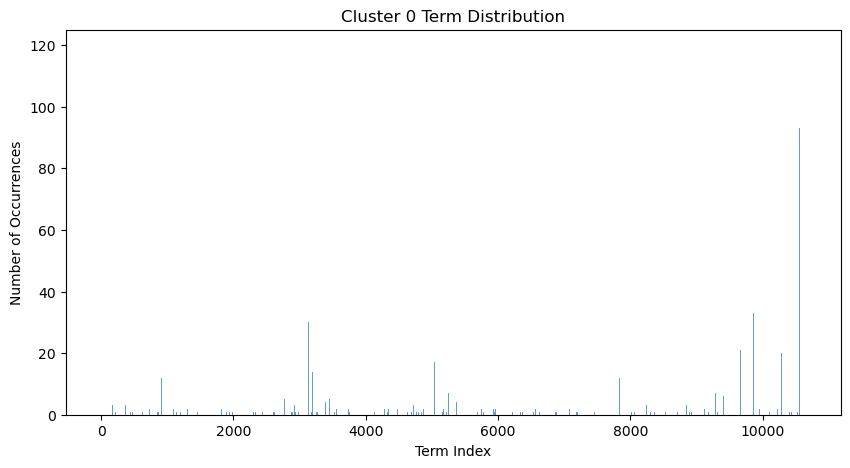

In [37]:
# plot the first key in the dictionary
plt.figure(figsize=(10, 5))
plt.hist(indexed_dict[0], bins=np.arange(0, len(value_to_index), 1), alpha=0.7)
plt.title("Cluster 0 Term Distribution")
plt.xlabel("Term Index")
plt.ylabel("Number of Occurrences")
plt.ylim(0, 125)
plt.show()

In [27]:
from scipy.stats import mannwhitneyu

In [28]:
# perform Mann-Whitney U tests for all combos of clusters

# Create a list of cluster labels
cluster_labels = list(indexed_dict.keys())

p_values = np.ones((len(cluster_labels), len(cluster_labels)))

for i, label1 in enumerate(cluster_labels):
    for j, label2 in enumerate(cluster_labels):
        if i >= j:
            continue

        # Perform Mann-Whitney U test (non-parametric test)
        u_stat, p_value = mannwhitneyu(indexed_dict[label1], indexed_dict[label2])
        p_values[i, j] = p_value
        p_values[j, i] = p_value


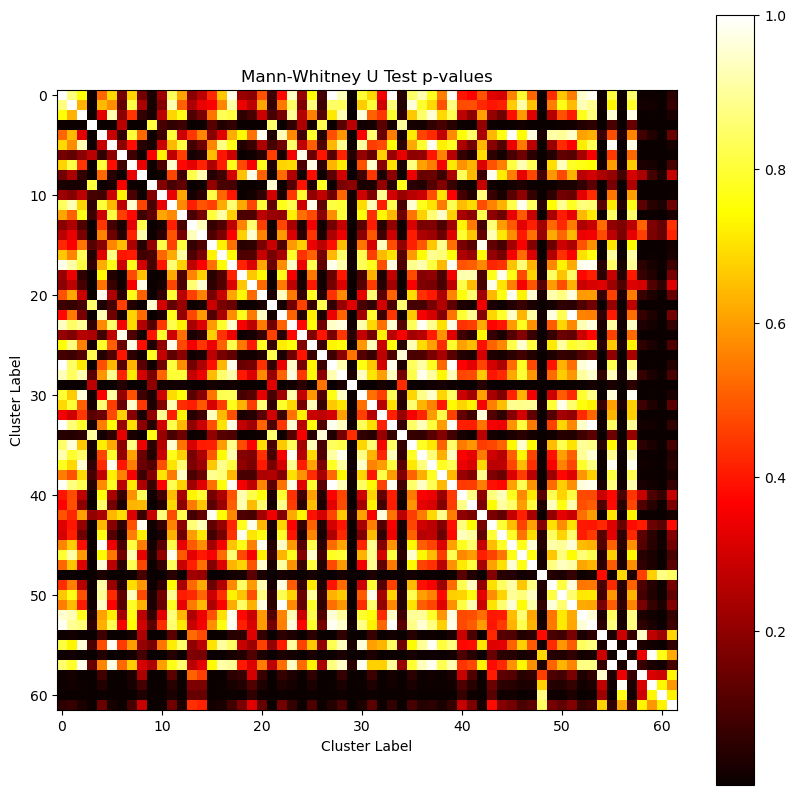

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(p_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Mann-Whitney U Test p-values")
plt.xlabel("Cluster Label")
plt.ylabel("Cluster Label")
plt.show()

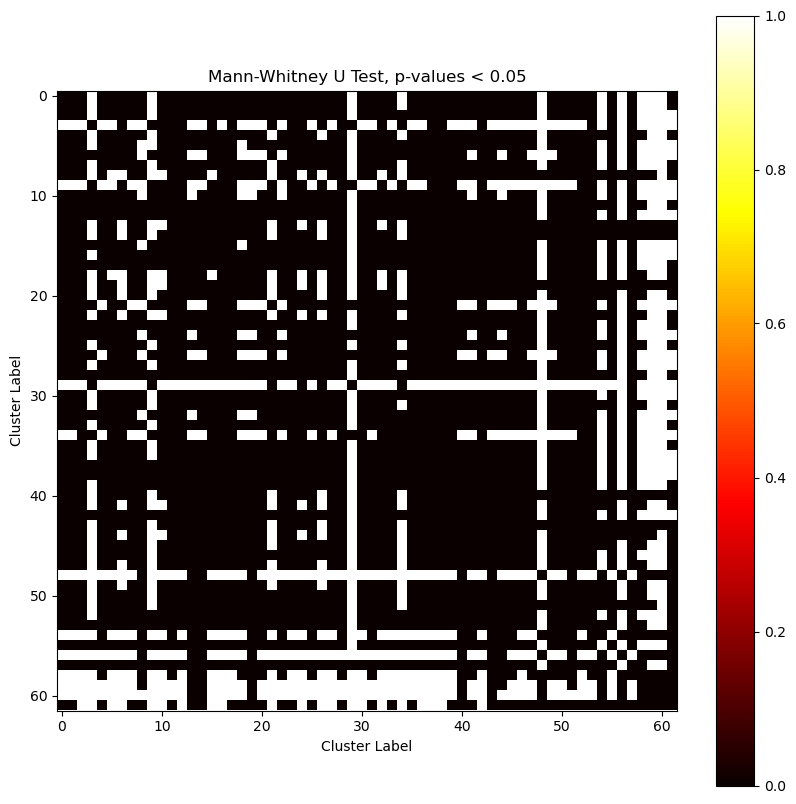

In [33]:
p_values_sig = np.where(p_values < 0.05, 1, 0)

plt.figure(figsize=(10, 10))
plt.imshow(p_values_sig, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Mann-Whitney U Test, p-values < 0.05")
plt.xlabel("Cluster Label")
plt.ylabel("Cluster Label")
plt.show()

In [34]:
# percentage of significant p-values
np.sum(p_values_sig) / (len(cluster_labels) ** 2)

0.24765868886576484